In [1]:
"""My project's aim is to assist the general population of New York. Overall,
my project analyzes which areas of NYC are most dangerous. 
It considers specific themes such as what crimes are more prone to happen 
in what areas and what time of day is safer in specific areas. More importantly 
it narrows down what neighborhood a crime happened based on specific features. 
This is important because of the implications that can be had. Basically,
with the right information, the following models have the potential to tell 
you what area the crime occurred. Of course, in a real-life example you already
know the area where the crime occurred, but consider you didn’t, and you only 
had specific information. 
Then the following models are able to somewhat narrow down the search radius. """

"My project's aim is to assist the general population of New York. Overall,\nmy project analyzes which areas of NYC are most dangerous. \nIt considers specific themes such as what crimes are more prone to happen \nin what areas and what time of day is safer in specific areas. More importantly \nit narrows down what neighborhood a crime happened based on specific features. \nThis is important because of the implications that can be had. Basically,\nwith the right information, the following models have the potential to tell \nyou what area the crime occurred. Of course, in a real-life example you already\nknow the area where the crime occurred, but consider you didn’t, and you only \nhad specific information. \nThen the following models are able to somewhat narrow down the search radius. "

In [4]:
"""What I hope to evince with this project is that any one of us has the 
potential to solve on going crimes. So, for all you mystery lovers, and 
want to be detectives out there, the following slides are going to show you 
how you can begin your sleuthing journey.  

Over the course of these slides, I am going to take you through 
all the steps in building the model.  Showing you the relevance behind each step,
the potential ways of analyzing the information, and the ways of interpreting it.  

"""

'What I hope to evince with this project is that any one of us has the \npotential to solve on going crimes. So, for all you mystery lovers, and \nwant to be detectives out there, the following slides are going to show you \nhow you can begin your sleuthing journey.  \n\nOver the course of these slides, I am going to take you through \nall the steps in building the model.  Showing you the relevance behind each step,\nthe potential ways of analyzing the information, and the ways of interpreting it.  \n\n'

In [3]:
"""The data set consists of NYC crime data, with features such as borough, 
latitude, longitude, crime, area of crime, date/time of crime, suspects race,
age, sex, and other various crime scene details. However, there are many features
that are completely irrelevant. This step is removing them. Not only is it
removing irrelevant columns, but it is dropping null values in specific features 
that are going to prove very useful. These are features such as the borough, 
data, time, the type of crime, and more. I am also replacing null values. """

'The data set consists of NYC crime data, with features such as borough, \nlatitude, longitude, crime, area of crime, date/time of crime, suspects race,\nage, sex, and other various crime scene details. However, there are many features\nthat are completely irrelevant. This step is removing them. Not only is it\nremoving irrelevant columns, but it is dropping null values in specific features \nthat are going to prove very useful. These are features such as the borough, \ndata, time, the type of crime, and more. I am also replacing null values. '

In [7]:
#importing
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import plotly.graph_objects as go

def import_and_modify(file_name):

    df = pd.read_csv(file_name)
    
    cols_to_remove = ['CMPLNT_NUM','ADDR_PCT_CD','CMPLNT_TO_DT', 'CMPLNT_TO_TM','CRM_ATPT_CPTD_CD', 'HADEVELOPT',
                      'HOUSING_PSA', 'JURISDICTION_CODE','KY_CD','PARKS_NM','TRANSIT_DISTRICT', 'X_COORD_CD', 'Y_COORD_CD',
                      'Lat_Lon','New Georeferenced Column', 'PATROL_BORO','PD_CD','RPT_DT','STATION_NAME','PD_DESC']
        
    df = df.drop(columns = cols_to_remove) 
    
    return df



#testing
df = import_and_modify('NYPD_Complaint_Data_Current__Year_To_Date__20231109.csv')

/tmp/ipykernel_11870/2034533948.py:20: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name)


In [8]:
def remove_nulls_and_replace(df): 
    cols = ['BORO_NM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM','LAW_CAT_CD','OFNS_DESC','Latitude', 'Longitude']
    for i in cols:
        second = df.dropna(subset = [i], how= 'any')
        
    columns_to_replace = ['JURIS_DESC', 'LOC_OF_OCCUR_DESC', 'PREM_TYP_DESC']
    df[columns_to_replace] = df[columns_to_replace].fillna('Unknown')
    
    return second
    
    
#testing
df = remove_nulls_and_replace(df)

In [9]:
def format_data(df):

    df['CMPLNT_FR_DT'] = pd.to_datetime(df['CMPLNT_FR_DT'], errors='coerce')

    df['CMPLNT_FR_TM'] = pd.to_timedelta(df['CMPLNT_FR_TM'], errors='coerce')

    df = df.rename(columns={'CMPLNT_FR_DT': 'DATE', 'CMPLNT_FR_TM': 'TIME'})
    
    df['Day_Night'] = df['TIME'].apply(lambda x: 'Day' if 10 <= x.seconds // 3600 < 18 else 'Night')
    
    return df

#testing
df = format_data(df)
#df.columns
df.head()

#df.shape

,BORO_NM,DATE,TIME,JURIS_DESC,LAW_CAT_CD,LOC_OF_OCCUR_DESC,OFNS_DESC,PREM_TYP_DESC,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,Latitude,Longitude,Day_Night
0,BRONX,2021-12-04,0 days 02:09:00,N.Y. POLICE DEPT,FELONY,INSIDE,RAPE,RESIDENCE - APT. HOUSE,25-44,BLACK,M,<18,BLACK,F,40.822271,-73.911698,Night
1,BRONX,2023-07-01,0 days 05:00:00,N.Y. POLICE DEPT,FELONY,(null),RAPE,(null),25-44,WHITE,M,25-44,UNKNOWN,F,40.822912,-73.870041,Night
3,STATEN ISLAND,2023-07-02,0 days 19:30:00,N.Y. POLICE DEPT,MISDEMEANOR,INSIDE,CRIMINAL MISCHIEF & RELATED OF,RESIDENCE-HOUSE,45-64,WHITE,M,25-44,WHITE,F,40.558491,-74.135201,Night
4,MANHATTAN,2023-09-19,0 days 18:05:00,N.Y. POLICE DEPT,MISDEMEANOR,INSIDE,PETIT LARCENY,STREET,UNKNOWN,WHITE HISPANIC,M,25-44,ASIAN / PACIFIC ISLANDER,M,40.711458,-74.012216,Night
5,STATEN ISLAND,2023-08-03,0 days 17:20:00,N.Y. POLICE DEPT,FELONY,INSIDE,GRAND LARCENY,FAST FOOD,25-44,ASIAN / PACIFIC ISLANDER,M,18-24,WHITE,F,40.541709,-74.207482,Day


In [10]:
df['BORO_NM'].unique()

array(['BRONX', 'STATEN ISLAND', 'MANHATTAN', 'BROOKLYN', 'QUEENS',
       '(null)'], dtype=object)

In [11]:
def filter_dataframe(df, ofns_desc=None, day_night=None, boro_nm=None, loc_of_occur_desc=None):

    conditions = [
        (df['OFNS_DESC'] == ofns_desc) if ofns_desc else True,
        (df['Day_Night'] == day_night) if day_night else True,
        (df['BORO_NM'] == boro_nm) if boro_nm else True,
        (df['LOC_OF_OCCUR_DESC'] == loc_of_occur_desc) if loc_of_occur_desc else True
    ]

    filtered_df = df[conditions[0] & conditions[1] & conditions[2] & conditions[3]]

    return filtered_df

# Testing
filtered_df = filter_dataframe(df, ofns_desc= None, day_night=None, boro_nm='BRONX', loc_of_occur_desc=None)
filtered_df.head()

,BORO_NM,DATE,TIME,JURIS_DESC,LAW_CAT_CD,LOC_OF_OCCUR_DESC,OFNS_DESC,PREM_TYP_DESC,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,Latitude,Longitude,Day_Night
0,BRONX,2021-12-04,0 days 02:09:00,N.Y. POLICE DEPT,FELONY,INSIDE,RAPE,RESIDENCE - APT. HOUSE,25-44,BLACK,M,<18,BLACK,F,40.822271,-73.911698,Night
1,BRONX,2023-07-01,0 days 05:00:00,N.Y. POLICE DEPT,FELONY,(null),RAPE,(null),25-44,WHITE,M,25-44,UNKNOWN,F,40.822912,-73.870041,Night
277,BRONX,1990-04-28,0 days 00:30:00,N.Y. POLICE DEPT,FELONY,OUTSIDE,MURDER & NON-NEGL. MANSLAUGHTER,(null),45-64,WHITE,M,45-64,WHITE,M,40.870387,-73.881977,Night
472,BRONX,2023-09-01,0 days 00:20:00,N.Y. POLICE DEPT,FELONY,OUTSIDE,MURDER & NON-NEGL. MANSLAUGHTER,(null),(null),(null),(null),45-64,WHITE HISPANIC,M,40.864717,-73.890683,Night
474,BRONX,2023-05-20,0 days 16:30:00,N.Y. HOUSING POLICE,FELONY,INSIDE,MURDER & NON-NEGL. MANSLAUGHTER,MULTI DWELL - PUBLIC HOUS,(null),(null),(null),18-24,BLACK,M,40.818369,-73.844726,Day


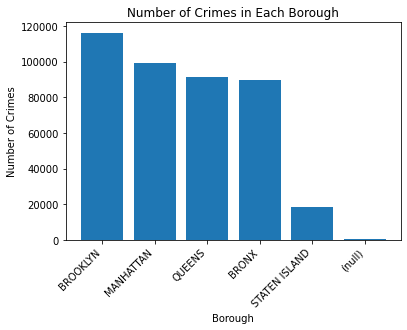

"From this image, I think it is clear that Brooklyn has the highest crime count.\nHowever, with this said, the data could be biased in some way towards Brooklyn and Manhattan. \nBecause as can also be seen, Staten Island has an extremely low count. It's abnormally low.  \n\nThis in mind, something I did not account for in this dataset is bias towards \nspecific boroughs. In future work, this could be accounted for by extracting \nmore data from other boroughs. Or a sampling technique that either reduces the \ncount for other boroughs or generates random samples for Staten Island. Kind of like\na bootstrap dataset for Staten Island. "

In [12]:
def graph(df):
    borough_counts = df['BORO_NM'].value_counts(dropna=True)
    plt.bar(borough_counts.index, borough_counts)
    plt.xlabel('Borough')
    plt.ylabel('Number of Crimes')
    plt.title('Number of Crimes in Each Borough')
    plt.xticks(rotation=45, ha='right')
    plt.show()
    
    return

#testing
graph(df)

"""From this image, I think it is clear that Brooklyn has the highest crime count.
However, with this said, the data could be biased in some way towards Brooklyn and Manhattan. 
Because as can also be seen, Staten Island has an extremely low count. It's abnormally low.  

This in mind, something I did not account for in this dataset is bias towards 
specific boroughs. In future work, this could be accounted for by extracting 
more data from other boroughs. Or a sampling technique that either reduces the 
count for other boroughs or generates random samples for Staten Island. Kind of like
a bootstrap dataset for Staten Island. """
    

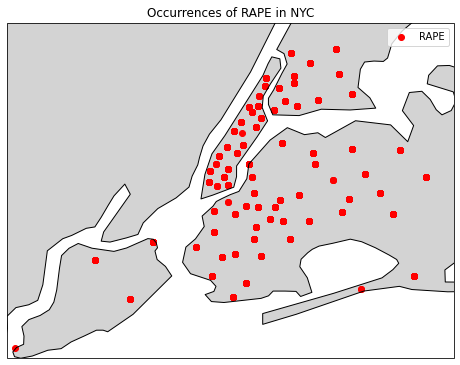

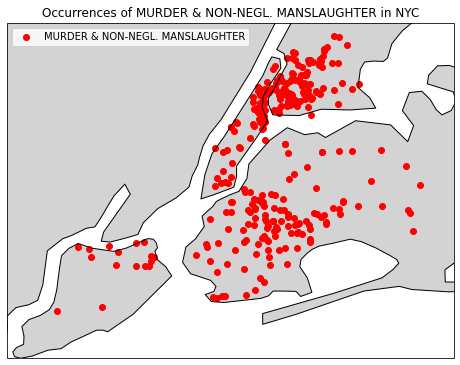

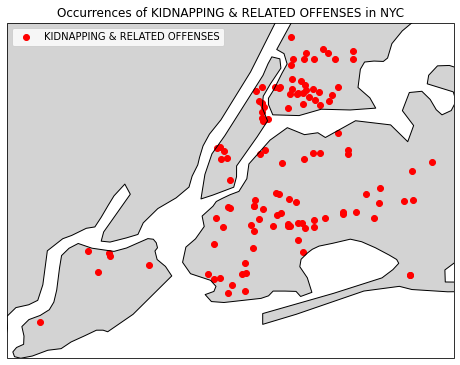

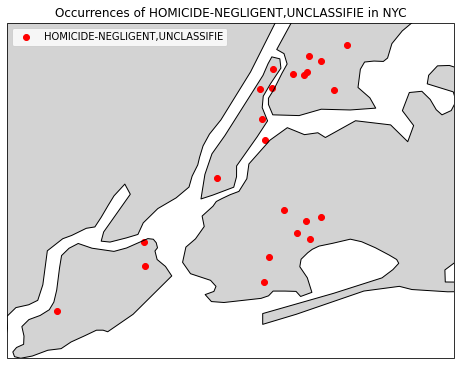

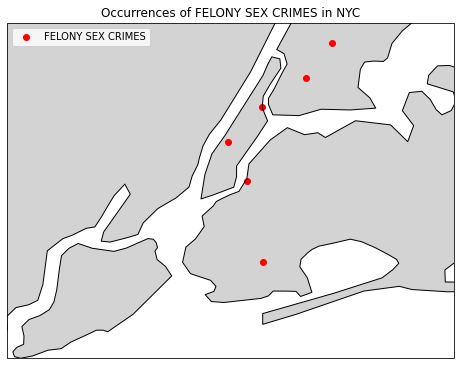

In [13]:
"""This function's purpose is to graph specific crimes in the NYC area.  
As can be seen from the images there are higher counts of kidnapping and 
murder versus other sex crimes and rape. What can also be seen is the occurrence 
of each crime in a specific NYC borough. For example, there is a lot of murder in 
Brooklyn, Queens and the Bronx. As for Rape, Manhattan has a very high count of it.
For kidnapping, it seems the Bronx and upper Manhattan takes the lead in terms of the
count. This function really helps to give you a visual idea of what is happening and 
where. What can we gather from this, well if you have a kid then keep him out of the
Bronx. And if you don’t want to get killed then Staten Island appears to be the 
safest place. More so, if you were trying to catch a killer, 
this could allow you to hone in on the more prominent areas for a specific crime. """
def nyc_maps(df):

    unique_crimes = ['RAPE', 'MURDER & NON-NEGL. MANSLAUGHTER',
                     'KIDNAPPING & RELATED OFFENSES', 
                     'HOMICIDE-NEGLIGENT,UNCLASSIFIE',  'FELONY SEX CRIMES']


    for crime_type in unique_crimes:

        plt.figure(figsize=(8, 8))

        crime_data = df[df['OFNS_DESC'] == crime_type]

        ax = plt.axes(projection=ccrs.PlateCarree())
        ax.set_extent([-74.26, -73.7, 40.5, 40.92]) 

        ax.coastlines(resolution='10m', linewidth=1)
        ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=1)
        ax.add_feature(cfeature.LAND, facecolor='lightgray')

        ax.scatter(crime_data['Longitude'], crime_data['Latitude'], color='red', marker='o', label=crime_type, transform=ccrs.PlateCarree())

        plt.title(f'Occurrences of {crime_type} in NYC')

        plt.legend()
        plt.show()

#testing   
nyc_maps(df)



        


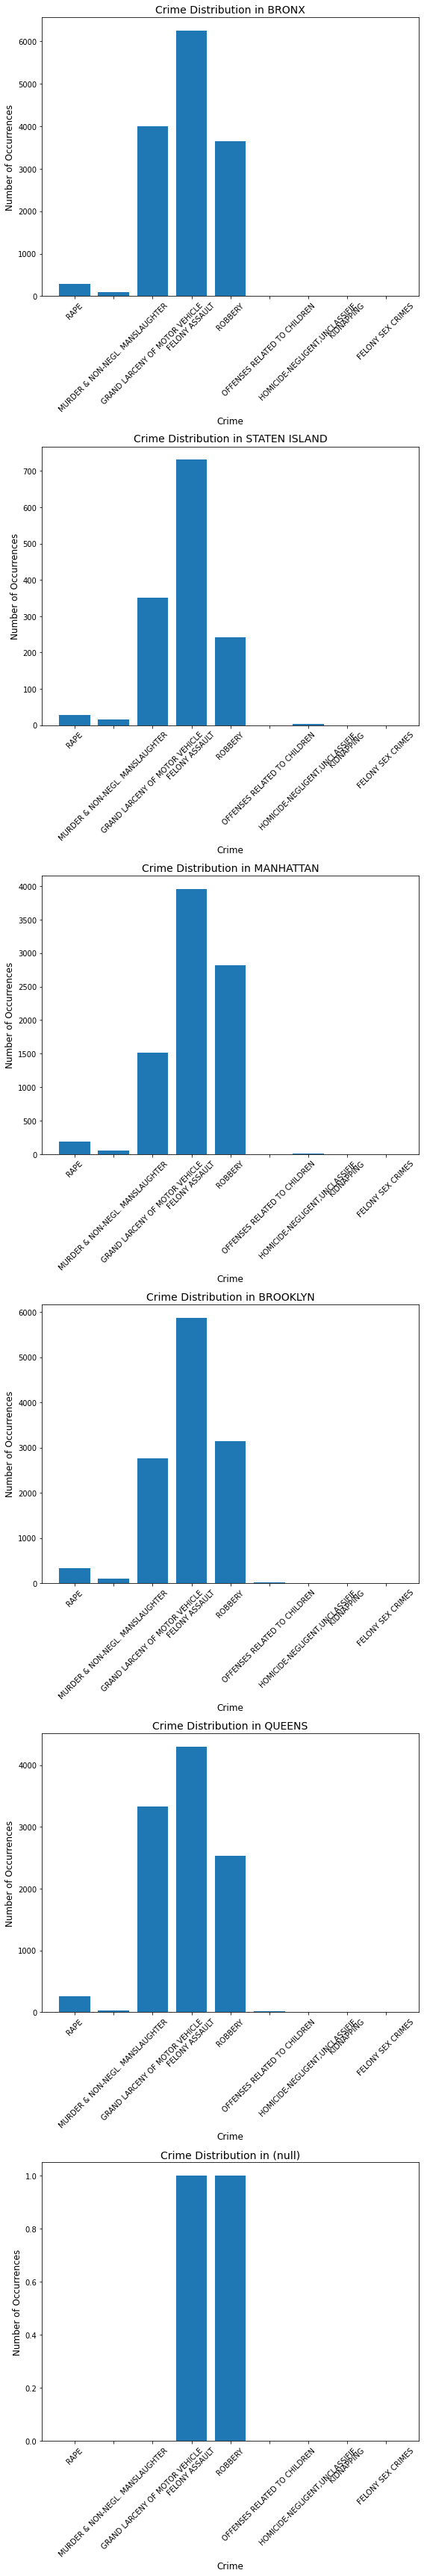

In [12]:
"""The method that created these graphical representations was a function that
looped through all boroughs and plotted the count of each crime in that borough, 
this was done using the filter function.
But as can be seen from these pictures. Felony Assault seems to have the highest 
count for both Brooklyn and Bronx. What is interesting for the Bronx is that there
are more motor vehicles stolen than common robberies.
So, I guess don’t go driving through the Bronx. """

def crime_rate(df):

    potential_crimes = ['RAPE', 'MURDER & NON-NEGL. MANSLAUGHTER',
                        'GRAND LARCENY OF MOTOR VEHICLE', 'FELONY ASSAULT', 'ROBBERY',
                        'OFFENSES RELATED TO CHILDREN', 'HOMICIDE-NEGLIGENT,UNCLASSIFIE', 
                        'KIDNAPPING', 'FELONY SEX CRIMES']

    potential_boroughs = ['BRONX', 'STATEN ISLAND', 'MANHATTAN', 'BROOKLYN', 'QUEENS', '(null)']

    fig, axes = plt.subplots(nrows=len(potential_boroughs), figsize=(8, 8 * len(potential_boroughs)))

    for i, borough in enumerate(potential_boroughs):
        borough_df = filter_dataframe(df, boro_nm=borough)

        crime_counts = {}

        for crime in potential_crimes:
            crime_df = filter_dataframe(borough_df, ofns_desc=crime)
            crime_count = len(crime_df)
            crime_counts[crime] = crime_count

        ax = axes[i]
        ax.bar(crime_counts.keys(), crime_counts.values())
        ax.set_xlabel('Crime', fontsize=12)  
        ax.set_ylabel('Number of Occurrences', fontsize=12)  
        ax.set_title(f'Crime Distribution in {borough}', fontsize=14) 
        ax.tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()
    
#testing
crime_rate(df)

/tmp/ipykernel_7056/3421329271.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_df.dropna(subset=['Latitude', 'Longitude'], inplace=True)
/tmp/ipykernel_7056/3421329271.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_df[['Latitude', 'Longitude']] = imputer.fit_transform(crime_df[['Latitude', 'Longitude']])
/home/matthewdicicco38/.local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  sup

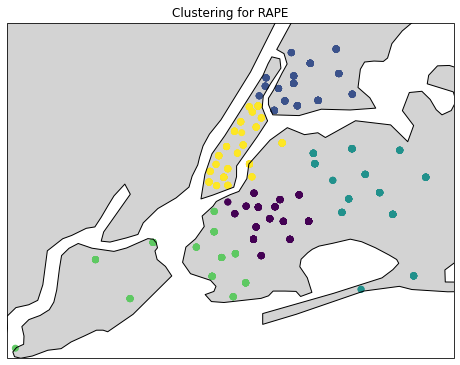

/tmp/ipykernel_7056/3421329271.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_df.dropna(subset=['Latitude', 'Longitude'], inplace=True)
/tmp/ipykernel_7056/3421329271.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_df[['Latitude', 'Longitude']] = imputer.fit_transform(crime_df[['Latitude', 'Longitude']])
/home/matthewdicicco38/.local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  sup

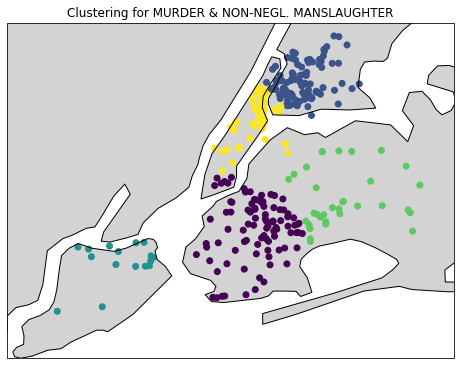

/tmp/ipykernel_7056/3421329271.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_df.dropna(subset=['Latitude', 'Longitude'], inplace=True)
/tmp/ipykernel_7056/3421329271.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_df[['Latitude', 'Longitude']] = imputer.fit_transform(crime_df[['Latitude', 'Longitude']])
/home/matthewdicicco38/.local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  sup

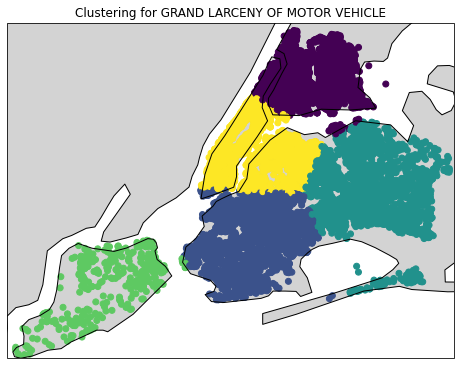

/tmp/ipykernel_7056/3421329271.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_df.dropna(subset=['Latitude', 'Longitude'], inplace=True)
/tmp/ipykernel_7056/3421329271.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_df[['Latitude', 'Longitude']] = imputer.fit_transform(crime_df[['Latitude', 'Longitude']])
/home/matthewdicicco38/.local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  sup

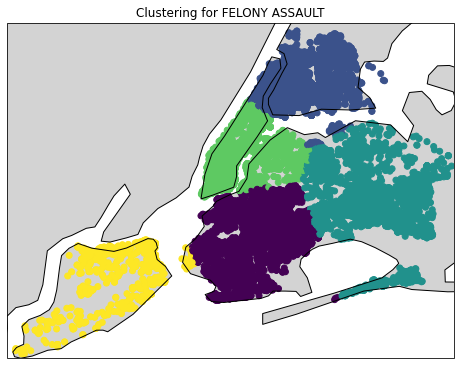

/tmp/ipykernel_7056/3421329271.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_df.dropna(subset=['Latitude', 'Longitude'], inplace=True)
/tmp/ipykernel_7056/3421329271.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_df[['Latitude', 'Longitude']] = imputer.fit_transform(crime_df[['Latitude', 'Longitude']])
/home/matthewdicicco38/.local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  sup

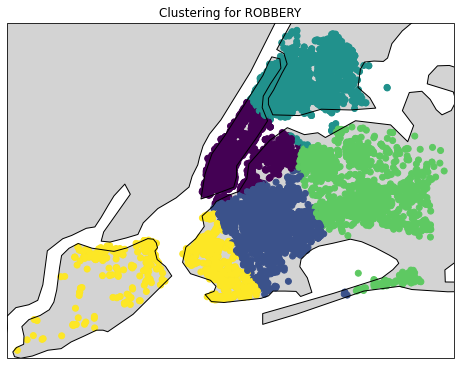

/tmp/ipykernel_7056/3421329271.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_df.dropna(subset=['Latitude', 'Longitude'], inplace=True)
/tmp/ipykernel_7056/3421329271.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_df[['Latitude', 'Longitude']] = imputer.fit_transform(crime_df[['Latitude', 'Longitude']])
/home/matthewdicicco38/.local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  sup

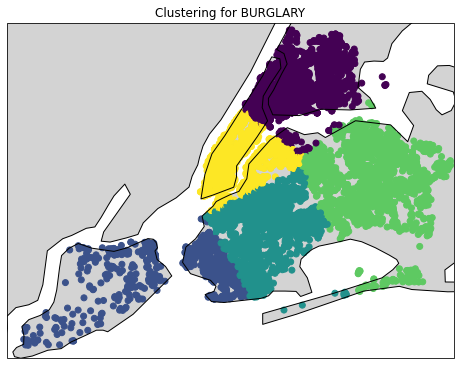

/tmp/ipykernel_7056/3421329271.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_df.dropna(subset=['Latitude', 'Longitude'], inplace=True)
/tmp/ipykernel_7056/3421329271.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_df[['Latitude', 'Longitude']] = imputer.fit_transform(crime_df[['Latitude', 'Longitude']])
/home/matthewdicicco38/.local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  sup

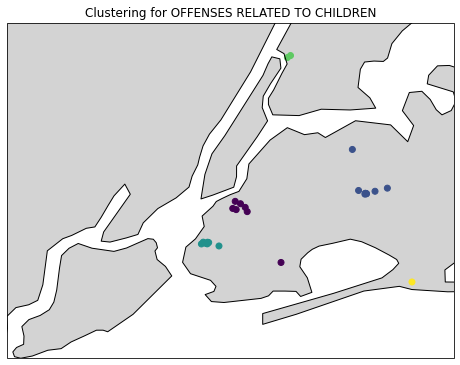

/tmp/ipykernel_7056/3421329271.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_df.dropna(subset=['Latitude', 'Longitude'], inplace=True)
/tmp/ipykernel_7056/3421329271.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_df[['Latitude', 'Longitude']] = imputer.fit_transform(crime_df[['Latitude', 'Longitude']])
/home/matthewdicicco38/.local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  sup

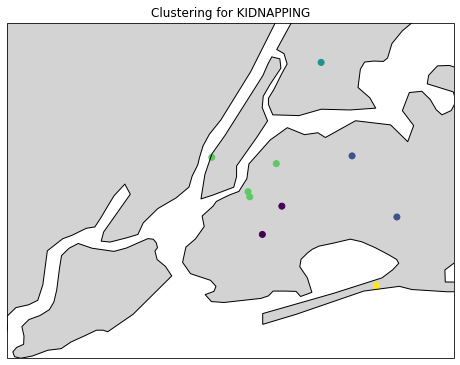

In [9]:
"""Finally, the actual models. I started off with building a kmeans model.
I looped through each potential crime, built a data frame that consisted of
samples from only that crime. And then ran a kmeans clustering on the latitude 
and longitude of each crime. Of course, this is redundant because I am physically 
clustering on the location, so it isn't telling me much in terms of predictive
capabilities. But it was my hope to see clearly defined clusters on each crime.
The more defined it is, the further it tells me that a crime is frequent with a 
specific area. 
As can be seen, the clusters do take on somewhat different shapes. The different 
shapes offer insight into where the crimes tend to gravitate towards positionally on a map. 
Future applications could incorporate other filters after the clustering to use 
this information in new and more informative ways. """

def cluster(df):
    crimes_to_plot = ['RAPE', 'MURDER & NON-NEGL. MANSLAUGHTER',
                    'GRAND LARCENY OF MOTOR VEHICLE', 'FELONY ASSAULT', 'ROBBERY',
                    'BURGLARY', 'OFFENSES RELATED TO CHILDREN','KIDNAPPING']

    for crime in crimes_to_plot:
        plt.figure(figsize=(8, 8))

        crime_df = filter_dataframe(df, ofns_desc=crime)
        crime_df.dropna(subset=['Latitude', 'Longitude'], inplace=True)

        # Impute missing values if any remain
        imputer = SimpleImputer(strategy='mean')
        crime_df[['Latitude', 'Longitude']] = imputer.fit_transform(crime_df[['Latitude', 'Longitude']])

        coordinates = crime_df[['Latitude', 'Longitude']]
        kmeans = KMeans(n_clusters=5, random_state=42)
        crime_df['Cluster'] = kmeans.fit_predict(coordinates)

        ax = plt.axes(projection=ccrs.PlateCarree())
        ax.set_extent([-74.26, -73.7, 40.5, 40.92]) 

        ax.coastlines(resolution='10m', linewidth=1)
        ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=1)
        ax.add_feature(cfeature.LAND, facecolor='lightgray')

        ax.scatter(coordinates['Longitude'], coordinates['Latitude'], 
                   c=crime_df['Cluster'], cmap='viridis', label='Clusters', transform=ccrs.PlateCarree())
        plt.title(f'Clustering for {crime}')
        plt.show()
    
#testing    
cluster(df)


In [10]:
print(df.columns)

Index(['BORO_NM', 'DATE', 'TIME', 'JURIS_DESC', 'LAW_CAT_CD',
       'LOC_OF_OCCUR_DESC', 'OFNS_DESC', 'PREM_TYP_DESC', 'SUSP_AGE_GROUP',
       'SUSP_RACE', 'SUSP_SEX', 'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX',
       'Latitude', 'Longitude', 'Day_Night'],
      dtype='object')


/home/matthewdicicco38/.local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/tmp/ipykernel_7056/2557327903.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_df['Predicted_Cluster'] = kmeans.fit_predict(crime_df_encoded)


<Figure size 864x576 with 0 Axes>

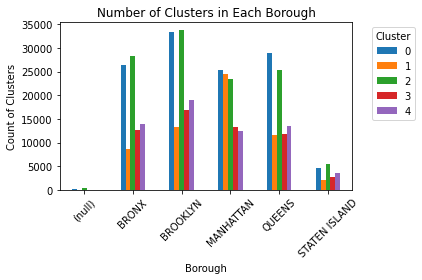

In [11]:
"""Considering the last clustering model wasn’t very informative. 
I decided to cluster on specific features such as the suspects age, 
sex, race, crime, date, and time to see what the predicted cluster would be.
What I hoped to gain from this is a better idea as to what pieces of information
are associated with a specific borough. Furthermore, I hoped to see that a specific
cluster dominated each borough. Which would tell me that a specific demographic 
was associated with a specific area. Implying that crime scene information is useful 
in narrowing down the region of crime. So that if you know the borough and crime involved 
for example, then you could guess if the victim is male or female, what age, what race,
and etc. Giving you important pieces of the sleuthing puzzle. From this graph, it appears
that for each borough, cluster 0 and 2 dominate, with cluster 1 in third place. Which 
proves that narrowing down crime to a specific race, age, and sex from the borough and
crime is harder than you think. """
def cluster_on_features(df):
    selected_features = ['VIC_RACE','VIC_SEX','VIC_AGE_GROUP','LAW_CAT_CD', 'LOC_OF_OCCUR_DESC', 'OFNS_DESC', 'Day_Night', 'PREM_TYP_DESC']

    crime_df = df[selected_features]

    crime_df_encoded = pd.get_dummies(crime_df, drop_first=True)

    kmeans = KMeans(n_clusters=5, random_state=42)
    crime_df['Predicted_Cluster'] = kmeans.fit_predict(crime_df_encoded)

    borough_cluster_count = pd.crosstab(index=df['BORO_NM'], columns=crime_df['Predicted_Cluster'])

    plt.figure(figsize=(12, 8))
    borough_cluster_count.plot(kind='bar', stacked=False)
    plt.title('Number of Clusters in Each Borough')
    plt.xlabel('Borough')
    plt.ylabel('Count of Clusters')
    plt.xticks(rotation=45)
    plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


cluster_on_features(df)




In [12]:
print(df.columns)

Index(['BORO_NM', 'DATE', 'TIME', 'JURIS_DESC', 'LAW_CAT_CD',
       'LOC_OF_OCCUR_DESC', 'OFNS_DESC', 'PREM_TYP_DESC', 'SUSP_AGE_GROUP',
       'SUSP_RACE', 'SUSP_SEX', 'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX',
       'Latitude', 'Longitude', 'Day_Night'],
      dtype='object')


/home/matthewdicicco38/.local/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Accuracy for RAPE: 0.3562


<Figure size 720x432 with 0 Axes>

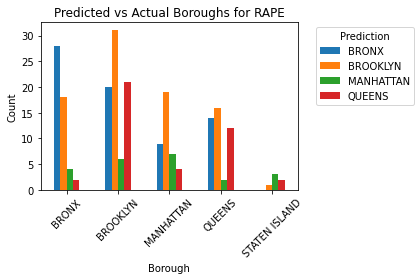

/home/matthewdicicco38/.local/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Accuracy for MURDER & NON-NEGL. MANSLAUGHTER: 0.3500


<Figure size 720x432 with 0 Axes>

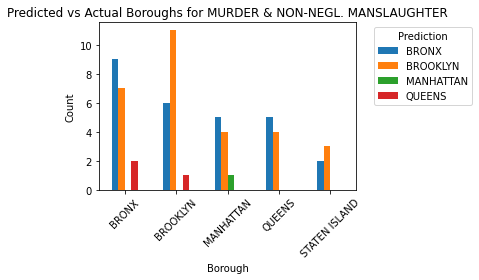

/home/matthewdicicco38/.local/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Accuracy for GRAND LARCENY OF MOTOR VEHICLE: 0.4151


<Figure size 720x432 with 0 Axes>

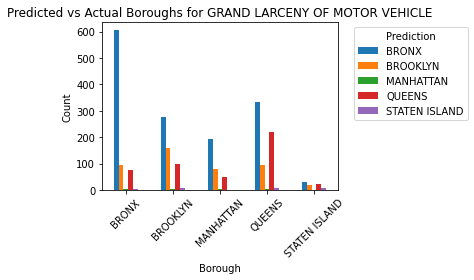

/home/matthewdicicco38/.local/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Accuracy for FELONY ASSAULT: 0.4140


<Figure size 720x432 with 0 Axes>

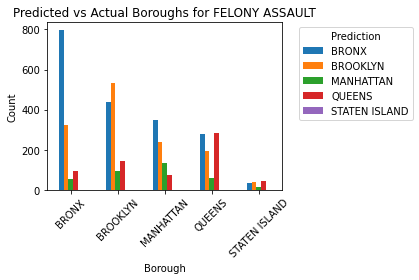

/home/matthewdicicco38/.local/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Accuracy for ROBBERY: 0.3974


<Figure size 720x432 with 0 Axes>

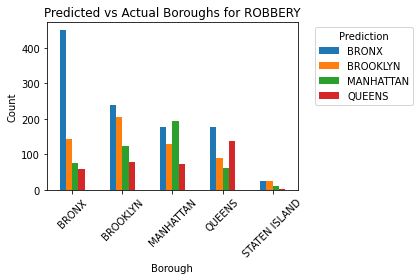

/home/matthewdicicco38/.local/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Accuracy for BURGLARY: 0.4266


<Figure size 720x432 with 0 Axes>

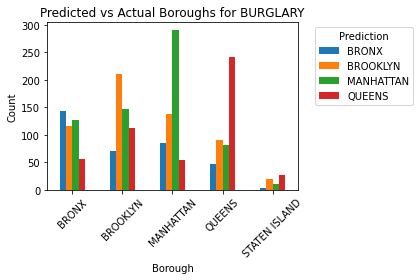

/home/matthewdicicco38/.local/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Accuracy for KIDNAPPING & RELATED OFFENSES: 0.2917


<Figure size 720x432 with 0 Axes>

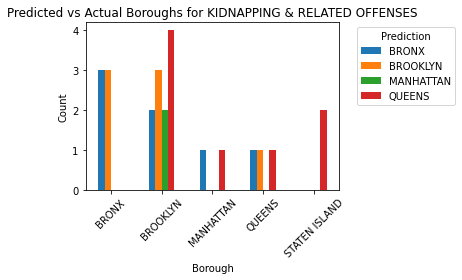

Accuracy for KIDNAPPING: 0.3333


/home/matthewdicicco38/.local/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


<Figure size 720x432 with 0 Axes>

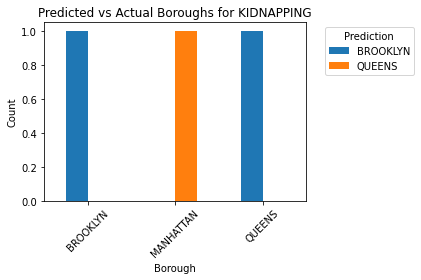

In [13]:
"""I now began to use supervised algorithms to solve the question of 
the occurrence of the crime. I implemented multi class logistic regression
and used predictors such as age, sex, date, time, race, inside/outside crime, 
and type of area of occurrence, while the y variable or the response was the borough.
Of course, this has a lot of features, making the model prone to overfitting, but 
I wanted to see what would happen. I also split the data set on training and testing
so to reduce the thought of overfitting. Above are the predicted results for each type
of crime and the borough associated with each crime. The x-axis markers represent the
true area where the crime occurred. So, any other counts for any other boroughs in 
that specific boroughs x axis are wrong predictions. As can be seen, the accuracy is
low for each crime. But considering we are predicting where a crime is based with no
information besides demographics, this is actually pretty good. Implying that you can
possibly narrow down a crime to specific area based on demographic information. The 
fact that NYC is so diverse furthermore aids in mitigating overfitting/bias/fitting
to noise in this model. """

def logregress(df):
    crimezz = ['RAPE', 'MURDER & NON-NEGL. MANSLAUGHTER', 'GRAND LARCENY OF MOTOR VEHICLE', 'FELONY ASSAULT', 'ROBBERY', 'BURGLARY', 'KIDNAPPING & RELATED OFFENSES', 'KIDNAPPING']
    

    for crime in crimezz:
        crime_data = df[df['OFNS_DESC'] == crime].copy() 
        selected_features = ['VIC_RACE', 'VIC_SEX', 'VIC_AGE_GROUP', 'LAW_CAT_CD', 'LOC_OF_OCCUR_DESC', 'Day_Night', 'PREM_TYP_DESC', 'BORO_NM']
        crime_data = crime_data[selected_features]
        crime_data = crime_data.dropna()
        categorical_cols = ['VIC_RACE', 'VIC_SEX', 'VIC_AGE_GROUP', 'LAW_CAT_CD', 'LOC_OF_OCCUR_DESC', 'Day_Night', 'PREM_TYP_DESC']
        X_categorical = crime_data[categorical_cols]
        y = crime_data['BORO_NM']
        encoder = OneHotEncoder(drop='first', sparse=False)
        X_categorical_encoded = encoder.fit_transform(X_categorical)
        encoded_features = encoder.get_feature_names_out(categorical_cols)
        X_encoded_df = pd.DataFrame(X_categorical_encoded, columns=encoded_features)

        X_train, X_test, y_train, y_test = train_test_split(X_encoded_df, y, test_size=0.2, random_state=42)

        model = LogisticRegression(max_iter=1000)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        print(f"Accuracy for {crime}: {accuracy:.4f}")

        results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

        grouped = results.groupby(['Actual', 'Predicted']).size().unstack(fill_value=0)

        # Plotting the bar chart
        plt.figure(figsize=(10, 6))
        grouped.plot(kind='bar', stacked=False)
        plt.title(f'Predicted vs Actual Boroughs for {crime}')
        plt.xlabel('Borough')
        plt.ylabel('Count')
        plt.legend(title='Prediction', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

#testing
logregress(df)



In [14]:

"""I next implemented Naïve Bayes. This model performed horribly.
I used the same features as the logistic regression model for the predictors
and the response. My thoughts are that naïve bayes performed so badly because 
of the underlying assumption of the model, which is that all predictors are 
independent of one another within a given class(or borough in this case). 
Given some of the features are collinear with one another, I'm thinking this
made the Naïve Bayes performance so bad. Logistic regression on the other hand 
doesn’t make assumptions such as independence of features (although it does help 
the model's predictive accuracy). """
def naive_bayes(df):

    categorical_cols = ['VIC_RACE', 'VIC_SEX', 'VIC_AGE_GROUP', 'LAW_CAT_CD', 'LOC_OF_OCCUR_DESC', 'OFNS_DESC', 'Day_Night', 'PREM_TYP_DESC']
    target = 'BORO_NM'

    data = df[categorical_cols + [target]]

    data = data.dropna()

    X = data.drop(target, axis=1)
    y = data[target]

    encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
    X_encoded = encoder.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

    model = GaussianNB()

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


#testing
naive_bayes(df)



/home/matthewdicicco38/.local/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Accuracy: 0.03615415176797775

Classification Report:
                precision    recall  f1-score   support

       (null)       0.00      0.97      0.01       145
        BRONX       0.26      0.02      0.03     18035
     BROOKLYN       0.36      0.01      0.02     23171
    MANHATTAN       0.50      0.02      0.04     19780
       QUEENS       0.47      0.02      0.03     18209
STATEN ISLAND       0.04      0.43      0.08      3721

     accuracy                           0.04     83061
    macro avg       0.27      0.24      0.04     83061
 weighted avg       0.38      0.04      0.03     83061


Confusion Matrix:
 [[  140     1     0     0     0     4]
 [ 9797   290   127    94    72  7655]
 [13020   348   231   173   159  9240]
 [ 8886   302   126   416   125  9925]
 [10004   151   140   131   327  7456]
 [ 2050    24    16    15    17  1599]]


In [30]:
"""Next, I implemented a random forest model to see how it would 
compare to the logistic regression models accuracy. I implemented it
in two of the following ways. For both ways I used the features of inside/outside,
type of area, charge, day/night, sex, race, and age as predictors. The response was 
the borough. The first was an overall prediction for the entire data set, although I 
did split the data in train and test. This gave an accuracy of 39%, its confusion
matrix is represented below. """

def random_forest(df):   
    df = df[df['BORO_NM'] != '(null)']
    selected_columns = ['LAW_CAT_CD', 'LOC_OF_OCCUR_DESC', 'OFNS_DESC', 'Day_Night', 'BORO_NM']
    df = df[selected_columns]

    df = df.dropna()
    df = df.iloc[-200000:]

    df_encoded = pd.get_dummies(df, columns=['LAW_CAT_CD', 'LOC_OF_OCCUR_DESC', 'OFNS_DESC', 'Day_Night'], drop_first=True)

    X = df_encoded.drop('BORO_NM', axis=1)
    y = df['BORO_NM']  
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    print("Accuracy:", accuracy_score(y_test, y_pred))
    print('\n')
    #print("\nClassification Report:\n", classification_report(y_test, y_pred))
    #print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
    return y_test, y_pred
#testing
y_test, y_pred =random_forest(df)


Accuracy: 0.394675




In [31]:
def visualize(df, y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    df = df[df['BORO_NM'] != '(null)']
    borough_labels = list(df['BORO_NM'].unique())

    fig = go.Figure(data=go.Heatmap(z=cm, x=borough_labels, y=borough_labels, colorscale='Viridis'))

    fig.update_layout(
        title='Confusion Matrix',
        xaxis=dict(title='Predicted Label'),
        yaxis=dict(title='True Label'),
    )

    for i, true_label in enumerate(borough_labels):
        for j, pred_label in enumerate(borough_labels):
            fig.add_annotation(
                x=pred_label,
                y=true_label,
                text=str(cm[i, j]),
                showarrow=False,
                font=dict(color='white' if cm[i, j] > cm.max() / 2 else 'black')
            )

    fig.show()
#testing
visualize(df, y_test, y_pred)


In [32]:
""" For this
I looped through each crime, filtering the dataset on that specific crime, and then
running the random forest. The results are above. For the specific crimes it seems 
the overall accuracy went down. Compared to logistic regression, it seems the random 
forest did considerably worse. My thoughts were that this was because decision trees 
are bit more flexible, capturing further noise in the data, and therefore doing worse
on the test data versus multi class logistic regression."""


crimezz = ['RAPE', 'MURDER & NON-NEGL. MANSLAUGHTER', 'GRAND LARCENY OF MOTOR VEHICLE', 'FELONY ASSAULT', 'ROBBERY', 'BURGLARY', 'KIDNAPPING & RELATED OFFENSES', 'KIDNAPPING']

def analyze_crime(df, crime_list):
    crime_results = {}
    for crime in crime_list:
        crime_data = df[df['OFNS_DESC'] == crime].copy()
        if not crime_data.empty:
            print(crime)
            y_test, y_pred = random_forest(crime_data)
            crime_results[crime] = (y_test, y_pred)
        else:
            print(f"No data for {crime} in the provided DataFrame.")
    return crime_results

results = analyze_crime(df, crimezz)


RAPE
Accuracy: 0.3059360730593607


MURDER & NON-NEGL. MANSLAUGHTER
Accuracy: 0.31666666666666665


GRAND LARCENY OF MOTOR VEHICLE
Accuracy: 0.3239966555183946


FELONY ASSAULT
Accuracy: 0.2992181947405828


ROBBERY
Accuracy: 0.28877221324717284


BURGLARY
Accuracy: 0.29773929773929775


KIDNAPPING & RELATED OFFENSES
Accuracy: 0.5


KIDNAPPING
Accuracy: 0.6666666666666666


